In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [20]:
external_df = pd.read_excel("External_Cibil_Dataset.xlsx")
internal_df = pd.read_excel("Internal_Bank_Dataset.xlsx")

In [21]:
print("External Dataset:")
print(external_df.head().T)
print(external_df.info())

External Dataset:
                                0             1             2       3       4
PROSPECTID                      1             2             3       4       5
time_since_recent_payment     549            47           302  -99999     583
time_since_first_deliquency    35        -99999            11  -99999  -99999
time_since_recent_deliquency   15        -99999             3  -99999  -99999
num_times_delinquent           11             0             9       0       0
...                           ...           ...           ...     ...     ...
GL_Flag                         0             0             0       0       0
last_prod_enq2                 PL  ConsumerLoan  ConsumerLoan  others      AL
first_prod_enq2                PL  ConsumerLoan        others  others      AL
Credit_Score                  696           685           693     673     753
Approved_Flag                  P2            P2            P2      P2      P1

[62 rows x 5 columns]
<class 'pandas.core.fra

In [23]:
print("\nInternal Dataset:")
print(internal_df.head().T)
print(internal_df.info())


Internal Dataset:
                         0    1       2    3        4
PROSPECTID             1.0  2.0   3.000  4.0    5.000
Total_TL               5.0  1.0   8.000  1.0    3.000
Tot_Closed_TL          4.0  0.0   0.000  0.0    2.000
Tot_Active_TL          1.0  1.0   8.000  1.0    1.000
Total_TL_opened_L6M    0.0  0.0   1.000  1.0    0.000
Tot_TL_closed_L6M      0.0  0.0   0.000  0.0    0.000
pct_tl_open_L6M        0.0  0.0   0.125  1.0    0.000
pct_tl_closed_L6M      0.0  0.0   0.000  0.0    0.000
pct_active_tl          0.2  1.0   1.000  1.0    0.333
pct_closed_tl          0.8  0.0   0.000  0.0    0.667
Total_TL_opened_L12M   0.0  1.0   2.000  1.0    0.000
Tot_TL_closed_L12M     0.0  0.0   0.000  0.0    0.000
pct_tl_open_L12M       0.0  1.0   0.250  1.0    0.000
pct_tl_closed_L12M     0.0  0.0   0.000  0.0    0.000
Tot_Missed_Pmnt        0.0  0.0   1.000  1.0    0.000
Auto_TL                0.0  0.0   1.000  0.0    1.000
CC_TL                  0.0  0.0   0.000  0.0    0.000
Consumer_

In [24]:
def dataset_overview(df, name="Dataset"):
    print(f"\n{name} Shape: {df.shape}")
    print(f"\n{name} Columns:\n", df.columns.tolist())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nUnique Values per Column:\n", df.nunique())

dataset_overview(external_df, "External Dataset")
dataset_overview(internal_df, "Internal Dataset")


External Dataset Shape: (51336, 62)

External Dataset Columns:
 ['PROSPECTID', 'time_since_recent_payment', 'time_since_first_deliquency', 'time_since_recent_deliquency', 'num_times_delinquent', 'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization', 'CC_Flag', 'PL_utilization', 'PL_Flag', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_e

In [25]:
external_df = external_df.replace(-99999, np.nan)

In [26]:
external_df = external_df.drop("PROSPECTID", axis=1)
internal_df = internal_df.drop("PROSPECTID", axis=1)

In [27]:
print("\nExternal Dataset Target Distribution (GL_Flag):")
print(external_df["GL_Flag"].value_counts(normalize=True))


External Dataset Target Distribution (GL_Flag):
GL_Flag
0    0.947113
1    0.052887
Name: proportion, dtype: float64


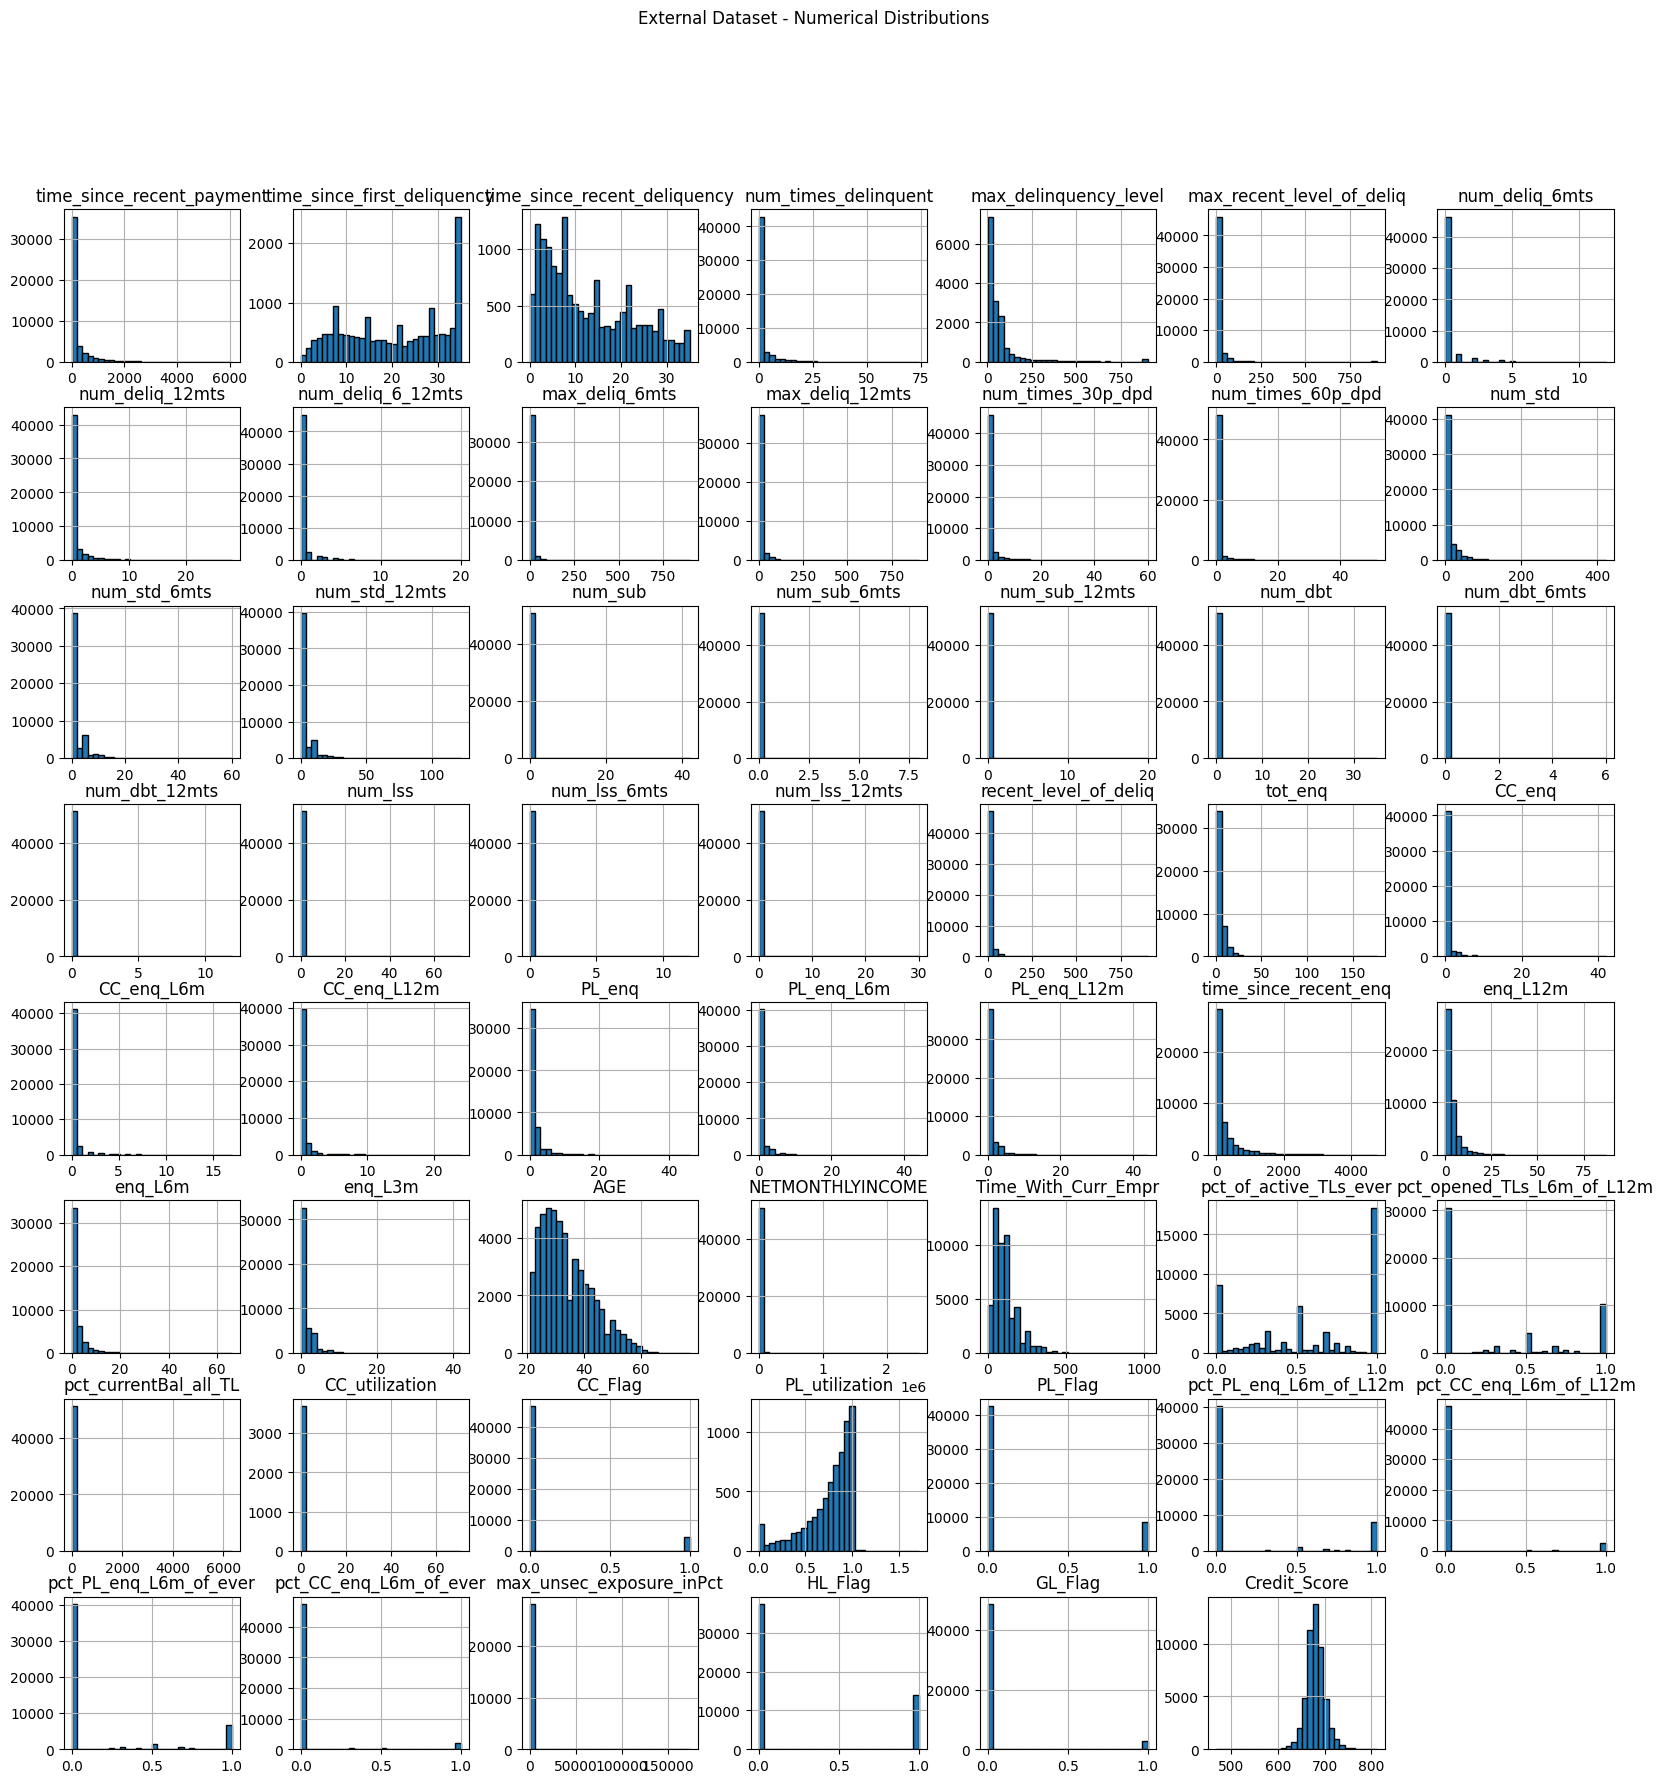

In [28]:
num_cols_ext = external_df.select_dtypes(include=[np.number]).columns.tolist()
external_df[num_cols_ext].hist(figsize=(20, 20), bins=30, edgecolor="black")
plt.suptitle("External Dataset - Numerical Distributions")
plt.show()

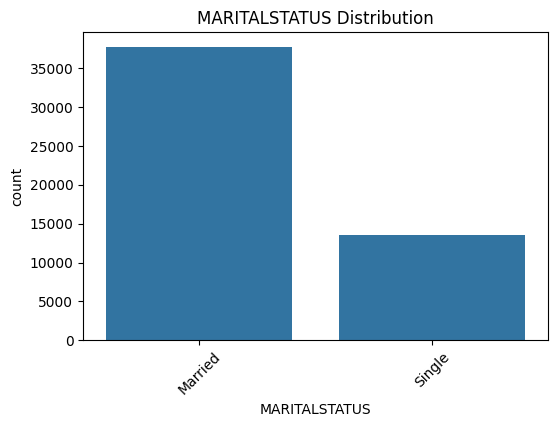

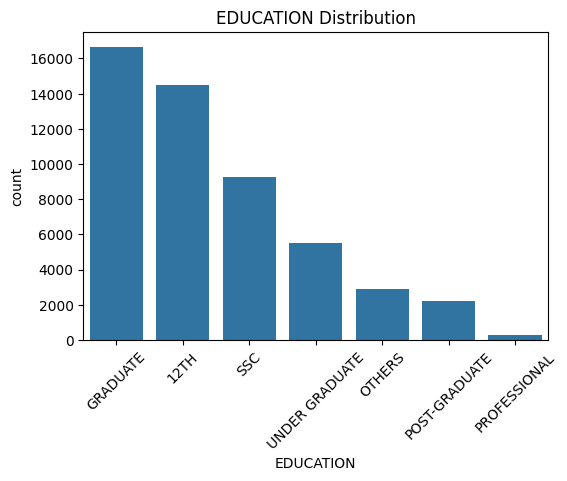

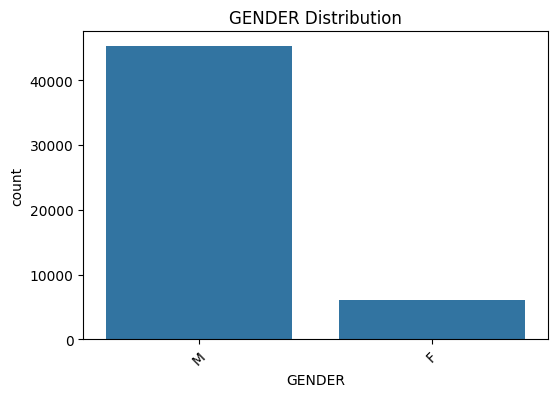

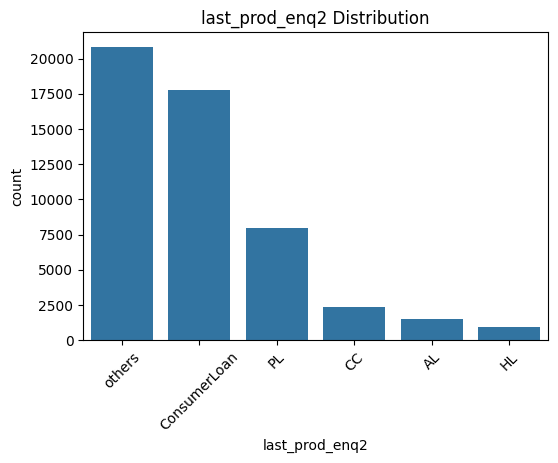

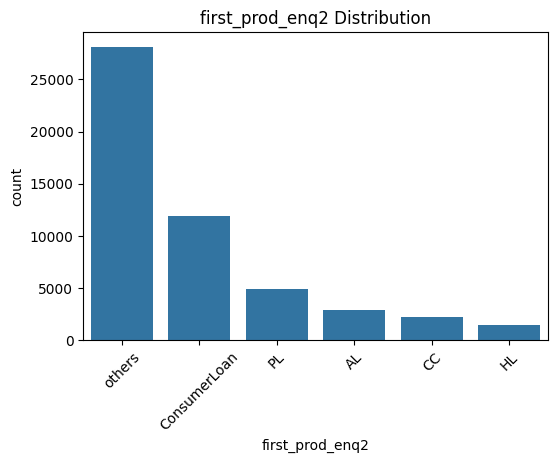

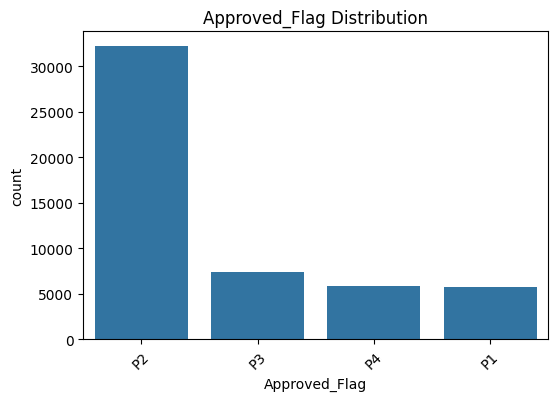

In [29]:
cat_cols_ext = external_df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols_ext:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=external_df, order=external_df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

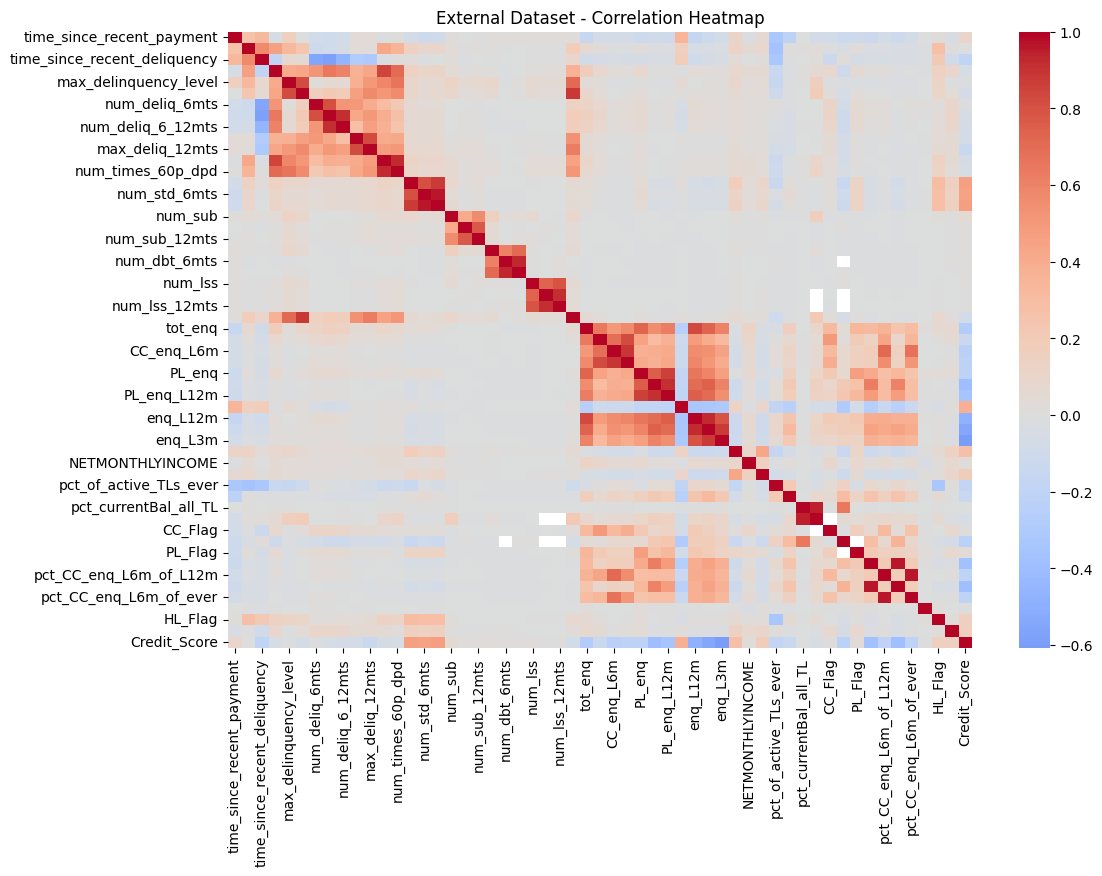

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(external_df[num_cols_ext].corr(), cmap="coolwarm", center=0)
plt.title("External Dataset - Correlation Heatmap")
plt.show()

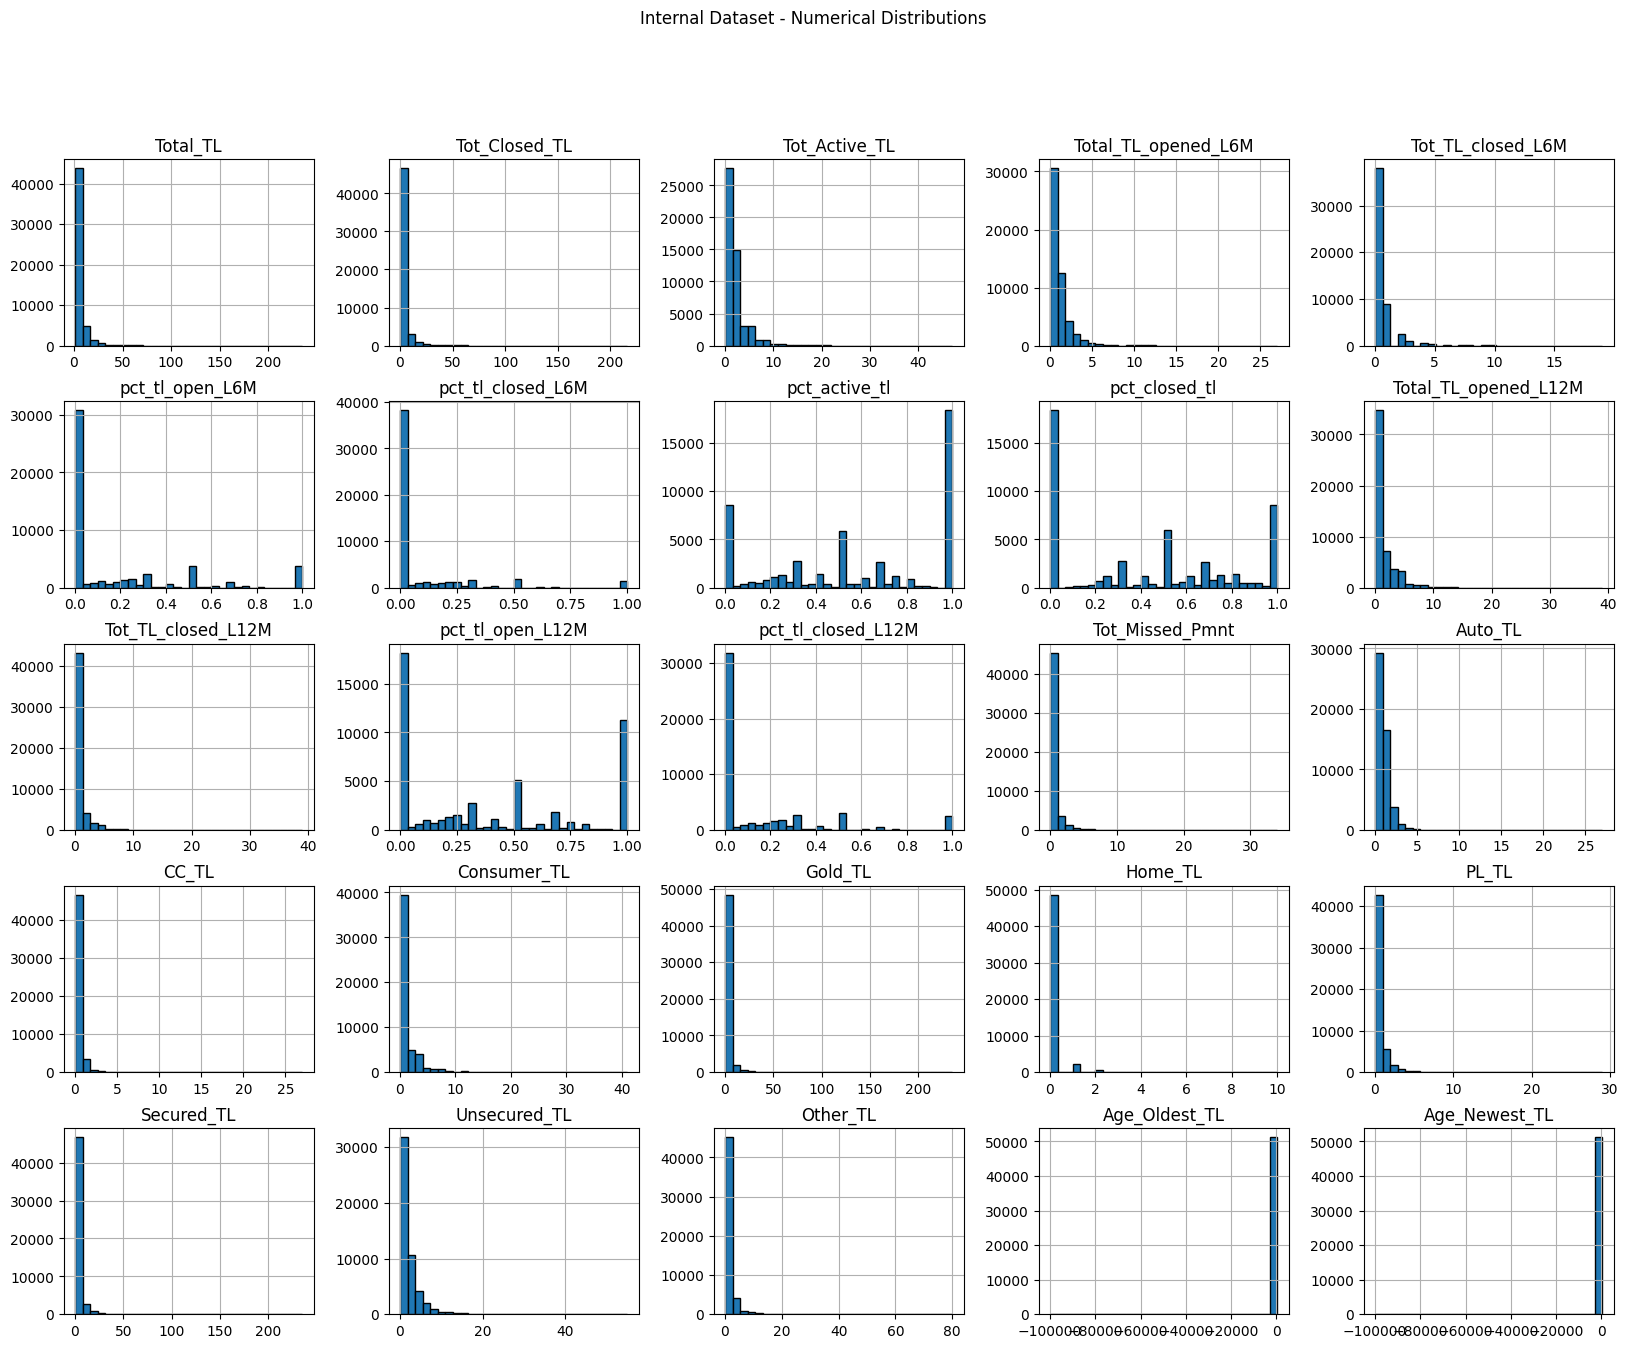

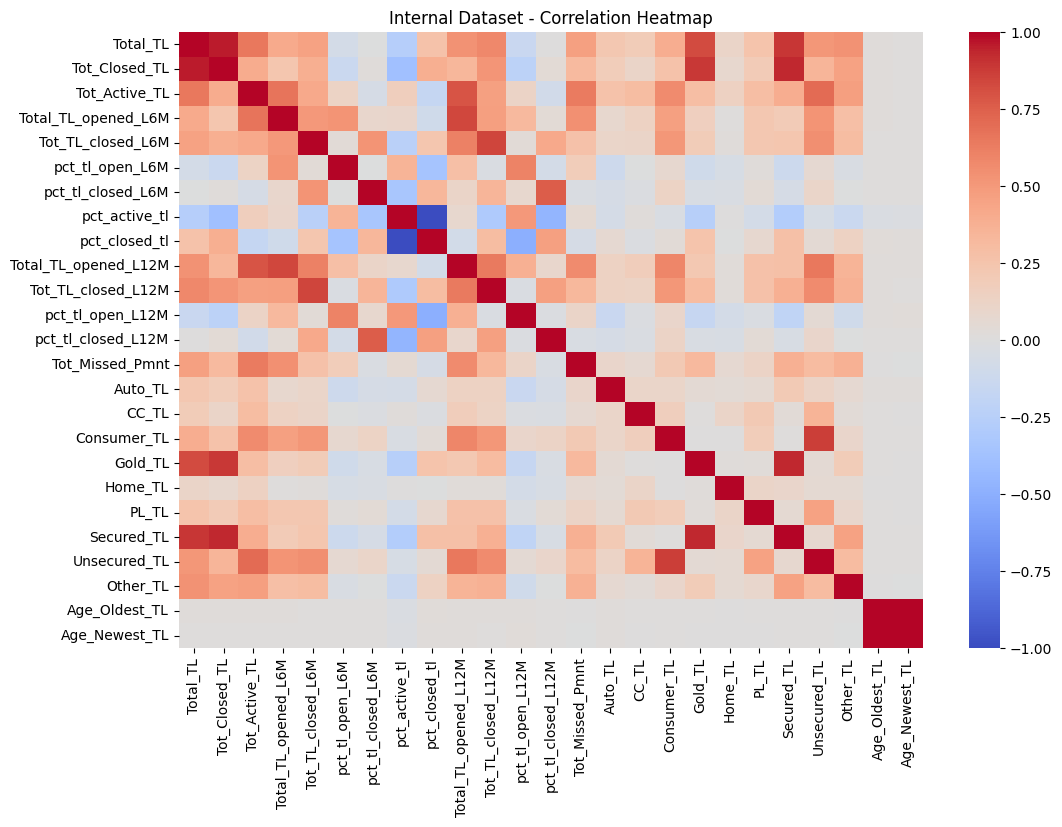

In [31]:
num_cols_int = internal_df.select_dtypes(include=[np.number]).columns.tolist()

internal_df[num_cols_int].hist(figsize=(20, 15), bins=30, edgecolor="black")
plt.suptitle("Internal Dataset - Numerical Distributions")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(internal_df.corr(), cmap="coolwarm", center=0)
plt.title("Internal Dataset - Correlation Heatmap")
plt.show()

In [32]:
combined_df = pd.merge(
    external_df, 
    internal_df, 
    left_index=True, 
    right_index=True, 
    how="inner"
)

In [34]:
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns

corr_with_target = combined_df[numeric_cols].corr()["GL_Flag"].sort_values(ascending=False)

print("\nCorrelation of Internal + External numeric features with GL_Flag:\n")
print(corr_with_target.head(20))   
print("\nLowest correlations:\n")
print(corr_with_target.tail(20))



Correlation of Internal + External numeric features with GL_Flag:

GL_Flag                 1.000000
Home_TL                 0.870874
num_std                 0.151057
Credit_Score            0.149753
num_std_12mts           0.148258
AGE                     0.141742
num_std_6mts            0.141344
Tot_Active_TL           0.131294
num_deliq_12mts         0.105818
Time_With_Curr_Empr     0.099808
Total_TL                0.098204
num_times_delinquent    0.098119
num_deliq_6mts          0.096296
CC_TL                   0.093667
PL_TL                   0.093104
num_deliq_6_12mts       0.090206
Secured_TL              0.087571
tot_enq                 0.082053
PL_Flag                 0.076200
CC_Flag                 0.075654
Name: GL_Flag, dtype: float64

Lowest correlations:

num_lss_6mts                   -0.003052
num_lss_12mts                  -0.003626
max_delinquency_level          -0.004454
enq_L12m                       -0.008494
pct_opened_TLs_L6m_of_L12m     -0.011809
pct_closed_tl 